# HSE 2024/2025: Mathematical Methods for Data Analysis

## Homework 5

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (0.5 points)
* [Task 4](#task3) (1 points)
* [Task 5](#task4) (0.5 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

Load the file `data_Mar_64.txt`.

In [2]:
import pandas as pd
data = pd.read_csv('data_Mar_64.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


This [dataset](https://archive.ics.uci.edu/dataset/241/one+hundred+plant+species+leaves+data+set) consists of work carried out by James Cope, Charles Mallah, and James Orwell, Kingston University London. The Leaves were collected in the Royal Botanic Gardens, Kew, UK.

For Each feature, a 64 element vector is given per sample of leaf. One file for each 64-element feature vectors. **Each row begins with the class label**. Here is the plant leaf **classification task**. The remaining 64 elements is the feature vector.

In [3]:
#Sixteen samples of leaf each of one-hundred plant species
data.shape

(1600, 65)

The first column is the target, put it in a separate variable.

In [4]:
import numpy as np

X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

**Task 1. <a id="task1"></a> (1.5 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics.
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y_name)


Split your data into **train** and **test** keeping 30% for the test.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Train SVM with linear kernel on your data to predict target. Calculate accuracy, F-score. Also print out confusion matrix

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)


Accuracy: 0.00625
F1 Score: 0.0037408424908424906
Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [3 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]


Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=1`

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=1)
X_pca = pca.fit_transform(X)


Select objects that match values from 0 to 15 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<=15]` to the `scatter` method.

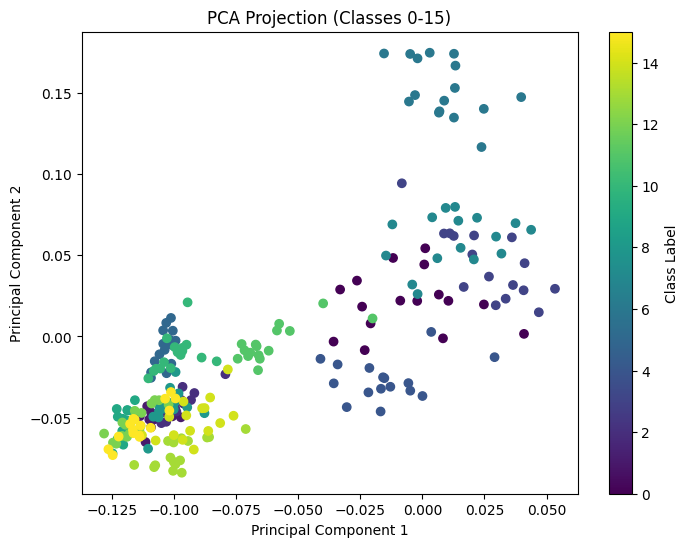

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

selected = y <= 15
X_selected = X_pca[selected]
y_selected = y[selected]

plt.figure(figsize=(8, 6))
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y_selected, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (Classes 0-15)')
plt.colorbar(label='Class Label')
plt.show()


Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

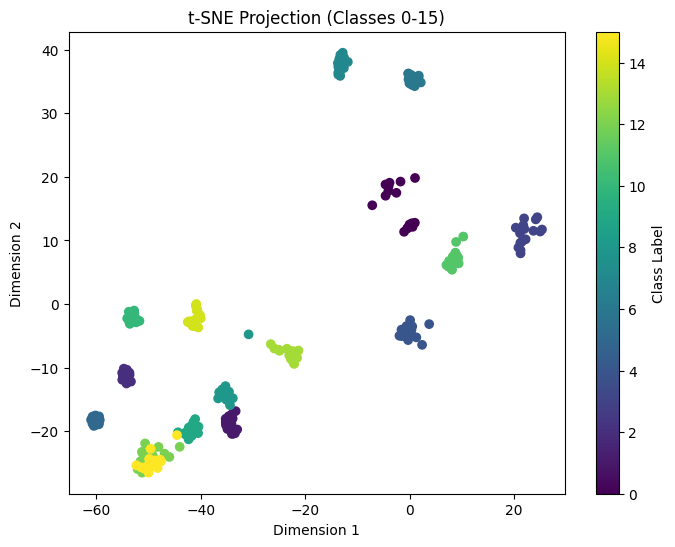

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X)

X_selected_tsne = X_tsne[selected]

plt.figure(figsize=(8, 6))
plt.scatter(X_selected_tsne[:, 0], X_selected_tsne[:, 1], c=y_selected, cmap='viridis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Projection (Classes 0-15)')
plt.colorbar(label='Class Label')
plt.show()


**Task 2. <a id="task2"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the TSNE method. Round the numbers to hundreds.

In [11]:
## your code here

cords_2_tsne = X_tsne[2]
print("Coordinates of X[2] after t-SNE:", np.round(cords_2_tsne, 2))


Coordinates of X[2] after t-SNE: [ 0.57 12.13]


**Task 3. <a id="task3"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the PCA method. Round the numbers to hundreds.

In [12]:
## your code here

cords_2_pca = X_pca[2]
print("Coordinates of X[2] after PCA:", np.round(cords_2_pca, 2))


Coordinates of X[2] after PCA: [-0.03  0.03]


**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

Option 2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

**Task 5. (0.5 points)** Again try to fit your simple classifier, this time using transformed data to two-dimensional space. To do it choose the best feature representation in your opinion from two existing. Did the metrics improve?

In [13]:
# Since PCA is more suitable for classification tasks, we'll use PCA-transformed data

from sklearn.model_selection import train_test_split

# Use the PCA-transformed data
X_pca = pca.fit_transform(X)

# Split the PCA-transformed data into train and test sets
X_pca_train, X_pca_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42
)

# Train the SVM classifier on the PCA-transformed data
clf_pca = SVC(kernel='linear', random_state=42)
clf_pca.fit(X_pca_train, y_train)

# Make predictions on the test set
y_pred_pca = clf_pca.predict(X_pca_test)

# Calculate metrics
acc_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')
cm_pca = confusion_matrix(y_test, y_pred_pca)

print("Accuracy on PCA-transformed data:", acc_pca)
print("F1 Score on PCA-transformed data:", f1_pca)
print("Confusion Matrix:\n", cm_pca)


Accuracy on PCA-transformed data: 0.0020833333333333333
F1 Score on PCA-transformed data: 1.572327044025157e-05
Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [3 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## K_means

**Task 6. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [14]:
from IPython.display import clear_output
from sklearn.metrics import pairwise_distances_argmin

def plot_clust(X, centers, labels, ax):
    ax.scatter(X[:,0], X[:,1], c=labels)
    ax.scatter(centers[:,0], centers[:,1], marker='>', color='red')

class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None
        self.centers = None
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        ## your code here
        centers = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return centers

    def update_labels(self, X):
        ## your code here
        labels = pairwise_distances_argmin(X, self.centers)
        return labels

    def fit(self, X):
        self.centers = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        self.labels = self.update_labels(X)

        for it in range(self.n_iters):
            new_labels = self.update_labels(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                print('Converged by tolerance centers')

                fig, ax = plt.subplots(1,1)
                plot_clust(X, new_centers, new_labels, ax)
                return 0

            self.centers = new_centers

            fig, ax = plt.subplots(1,1)
            plot_clust(X, new_centers, new_labels, ax)
            plt.pause(0.3)
            clear_output(wait=True)

        return 1

    def predict(self, X):
        labels = pairwise_distances_argmin(X, self.centers)
        return labels


Generating data for clustering

In [15]:
def update_centers(self, X):
    centers = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])
    return centers


In [16]:
def update_labels(self, X):
    labels = pairwise_distances_argmin(X, self.centers)
    return labels


In [17]:
def fit(self, X):
    self.centers = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
    self.labels = self.update_labels(X)

    for it in range(self.n_iters):
        new_labels = self.update_labels(X)
        self.labels = new_labels

        new_centers = self.update_centers(X)
        if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
            self.centers = new_centers
            self.labels = new_labels
            print('Converged by tolerance centers')

            fig, ax = plt.subplots(1,1)
            plot_clust(X, new_centers, new_labels, ax)
            return 0

        self.centers = new_centers

        fig, ax = plt.subplots(1,1)
        plot_clust(X, new_centers, new_labels, ax)
        plt.pause(0.3)
        clear_output(wait=True)

    return 1


In [18]:
def predict(self, X):
    labels = pairwise_distances_argmin(X, self.centers)
    return labels


Converged by tolerance centers


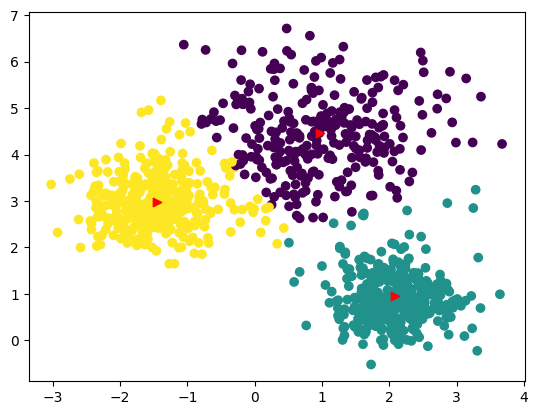

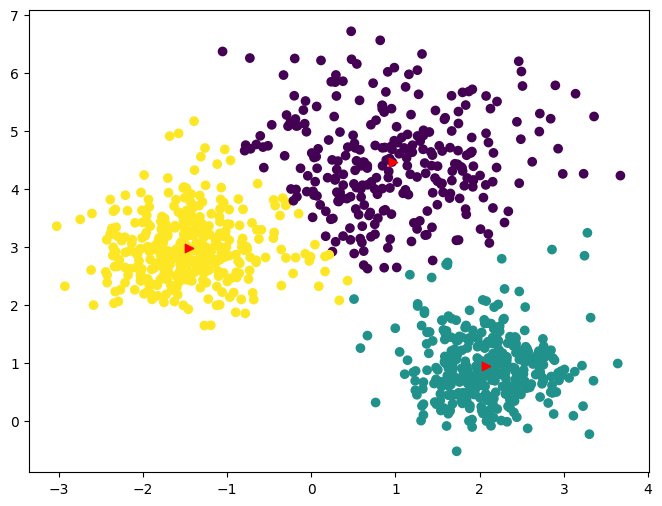

In [19]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

# Generate synthetic data
n_samples = 1000
noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                                  cluster_std=[1.0, 0.5, 0.5],
                                  random_state=0)

X, y = noisy_blobs

# Instantiate and fit the custom KMeans model
kmeans = MyKMeans(n_clusters=3, n_iters=100, seed=42)
kmeans.fit(X)

# Predict cluster labels
labels = kmeans.predict(X)

# Plot the final clusters
fig, ax = plt.subplots(1,1, figsize=(8,6))
plot_clust(X, kmeans.centers, labels, ax)
plt.show()


**Task 7. <a id="task6"></a> (1.5 points)**

7.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=3`. Plot result. Specify the result label for the object with index 0.

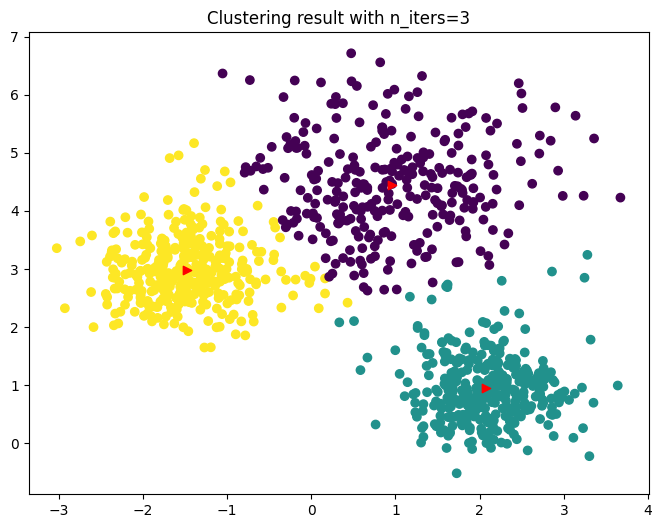

Label of object at index 0 with n_iters=3: 2


In [20]:
# Task 7.1
# Cluster noisy_blobs objects with MyKMeans, n_clusters=3, n_iters=3
kmeans_3iters = MyKMeans(n_clusters=3, n_iters=3, seed=42)
kmeans_3iters.fit(X)
labels_3iters = kmeans_3iters.labels

# Plot result
fig, ax = plt.subplots(1,1, figsize=(8,6))
plot_clust(X, kmeans_3iters.centers, labels_3iters, ax)
plt.title("Clustering result with n_iters=3")
plt.show()

# Print label for object with index 0
print("Label of object at index 0 with n_iters=3:", labels_3iters[0])


7.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 100`. Plot result. Specify the result label for the object with index 0.

Converged by tolerance centers


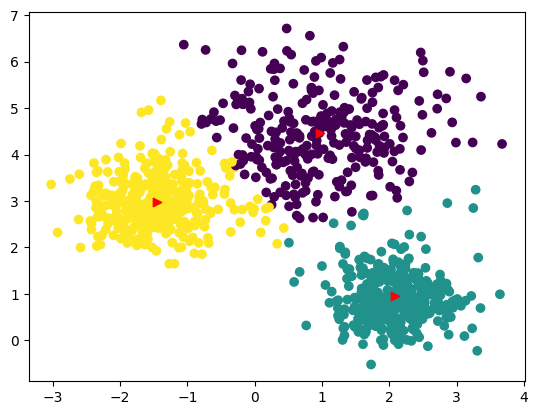

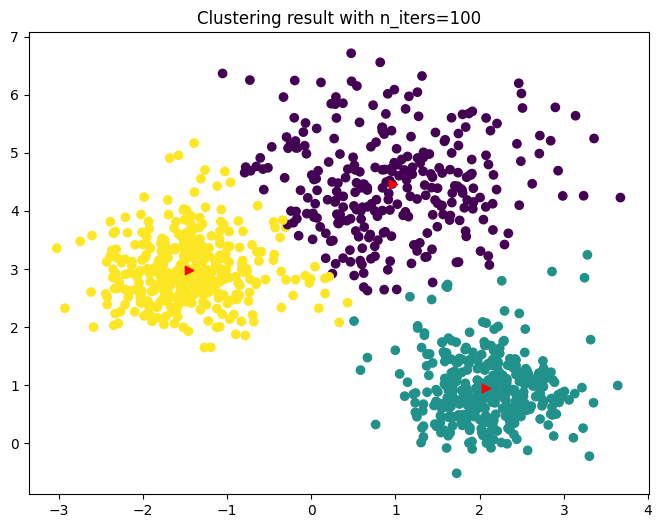

Label of object at index 0 with n_iters=100: 2


In [21]:
# Task 7.2
# Cluster noisy_blobs objects with MyKMeans, n_clusters=3, n_iters=100
kmeans_100iters = MyKMeans(n_clusters=3, n_iters=100, seed=42)
kmeans_100iters.fit(X)
labels_100iters = kmeans_100iters.labels

# Plot result
fig, ax = plt.subplots(1,1, figsize=(8,6))
plot_clust(X, kmeans_100iters.centers, labels_100iters, ax)
plt.title("Clustering result with n_iters=100")
plt.show()

# Print label for object with index 0
print("Label of object at index 0 with n_iters=100:", labels_100iters[0])


7.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 3 to 100

In [22]:
# Task 7.3
# Calculate how many objects changed labels
num_of_changed = np.sum(labels_3iters != labels_100iters)
print("Number of objects that changed labels:", num_of_changed)


Number of objects that changed labels: 4


**Task 8. <a id="task6"></a> (1.5 points)**

Using the elbow method, select the optimal number of clusters, show it on the plot. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them divided by number of clusters. To do this, iterate the parameter k from 2 to 50 in steps of 2.

Converged by tolerance centers


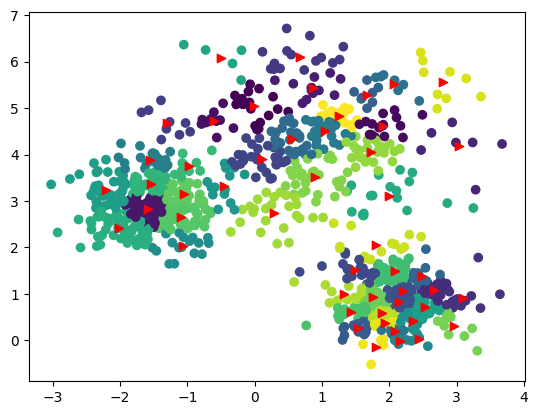

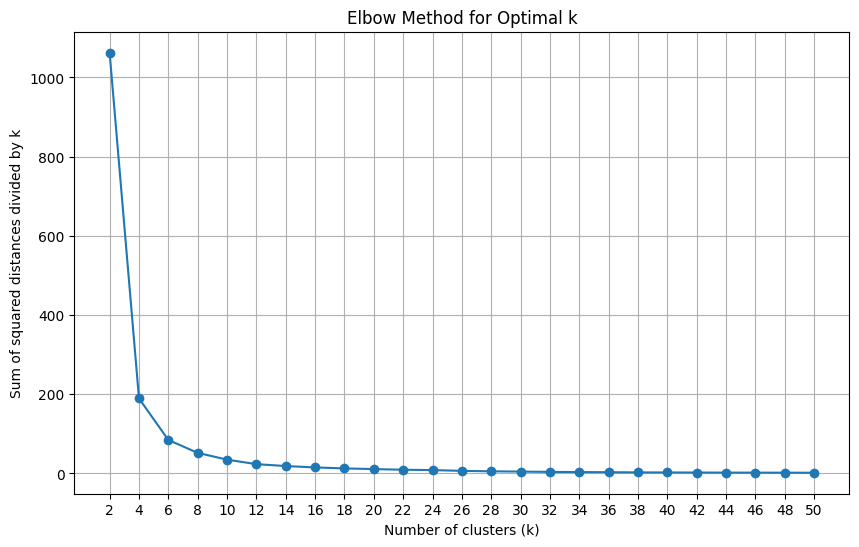

In [23]:
# Task 8: Using the elbow method to select the optimal number of clusters

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Define the range of k values to test
ks = range(2, 51, 2)  # From 2 to 50 inclusive, step of 2
sse = []  # Sum of squared errors for each k

# Loop over k values
for k in ks:
    # Instantiate MyKMeans with current k
    kmeans = MyKMeans(n_clusters=k, n_iters=100, seed=42)
    kmeans.fit(X)

    # Compute the sum of squared distances to the nearest cluster center
    distances = np.linalg.norm(X - kmeans.centers[kmeans.labels], axis=1)
    squared_distances = distances ** 2
    sse_k = np.sum(squared_distances)

    # Divide by the number of clusters as per the metric definition
    metric = sse_k / k
    sse.append(metric)

# Plot the metric versus k
plt.figure(figsize=(10, 6))
plt.plot(ks, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances divided by k')
plt.title('Elbow Method for Optimal k')
plt.xticks(ks)
plt.grid(True)
plt.show()


In [24]:
from sklearn.cluster import KMeans

sse = []

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    # The inertia_ attribute is the sum of squared distances to the nearest cluster center
    metric = kmeans.inertia_ / k
    sse.append(metric)


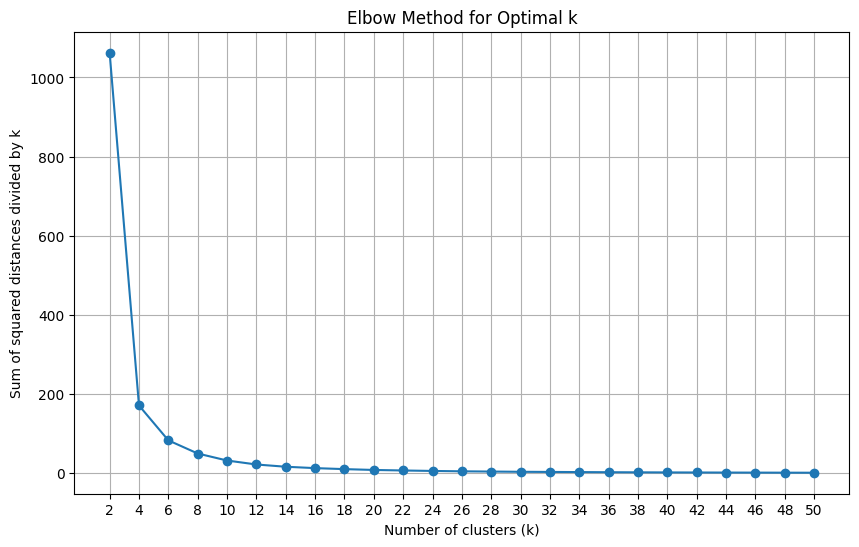

In [25]:
from sklearn.cluster import KMeans

sse = []

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    metric = kmeans.inertia_ / k
    sse.append(metric)

# Plot the metric versus k
plt.figure(figsize=(10, 6))
plt.plot(ks, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances divided by k')
plt.title('Elbow Method for Optimal k')
plt.xticks(ks)
plt.grid(True)
plt.show()


## DBSCAN

**Task 9. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.3` hyperparameter. Plot result. Specify the response for the object with index 2.

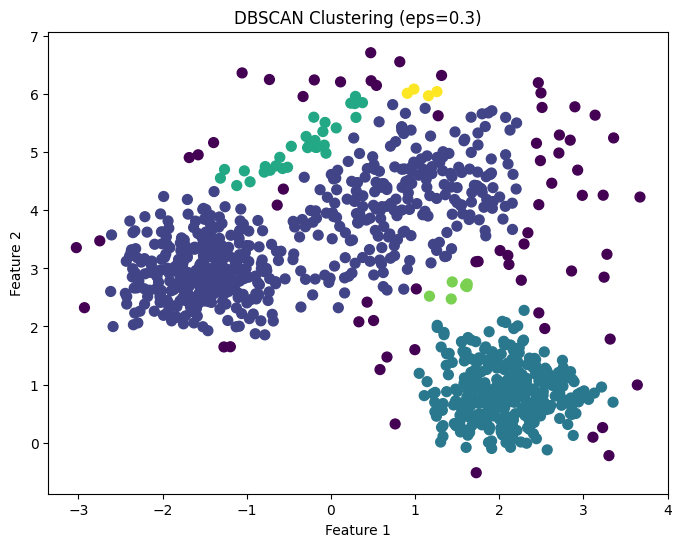

The cluster label for the object at index 2 is: 0


In [26]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline

# Task 9: Cluster noisy_blobs objects using DBSCAN with eps=0.3

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# Get the labels assigned by DBSCAN
labels_dbscan = dbscan.labels_

# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis', s=50)
plt.title('DBSCAN Clustering (eps=0.3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Specify the response for the object with index 2
print(f"The cluster label for the object at index 2 is: {labels_dbscan[2]}")


**Task 10. <a id="task8"></a> (1 point)**

Try different settings of ```eps``` distances (from 0.1 to 0.5) and several values of your choice of ```min_samples```. For each setting plot results. Also output the number of clusters and outliers (objects marked as -1).

eps=0.1, min_samples=3
Estimated number of clusters: 63
Estimated number of noise points: 349


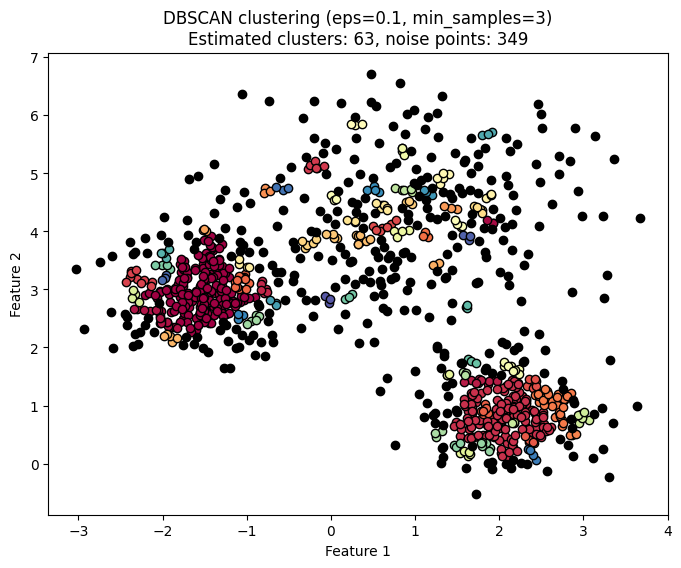

eps=0.1, min_samples=5
Estimated number of clusters: 25
Estimated number of noise points: 567


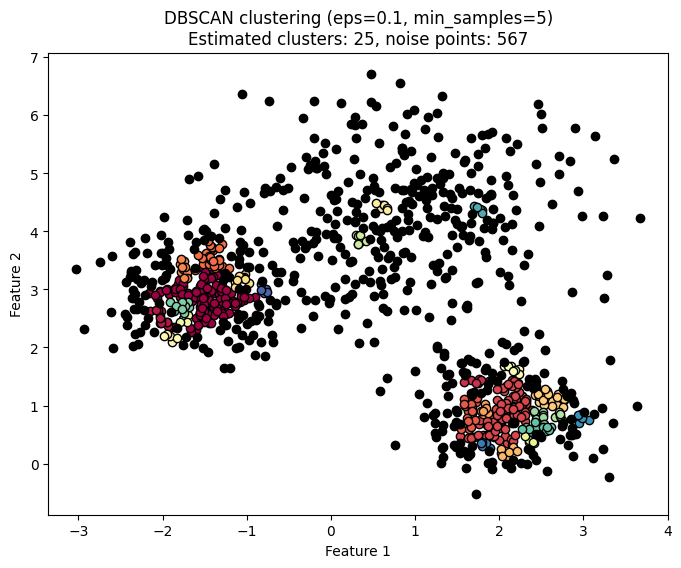

eps=0.1, min_samples=10
Estimated number of clusters: 5
Estimated number of noise points: 902


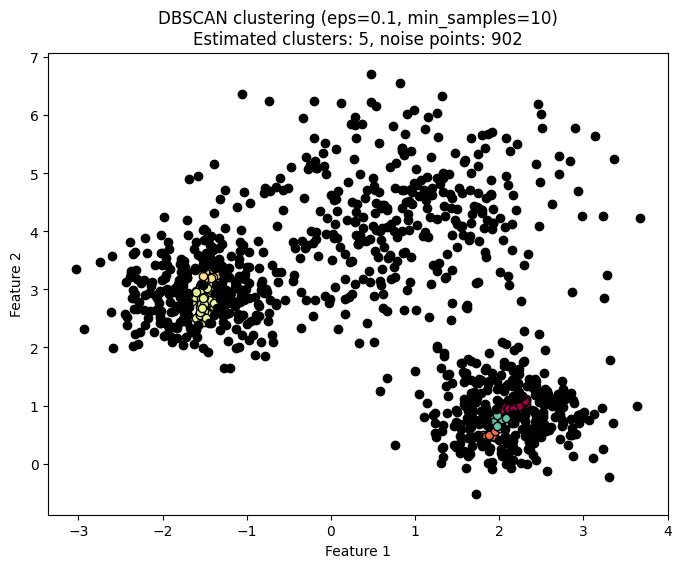

eps=0.2, min_samples=3
Estimated number of clusters: 17
Estimated number of noise points: 96


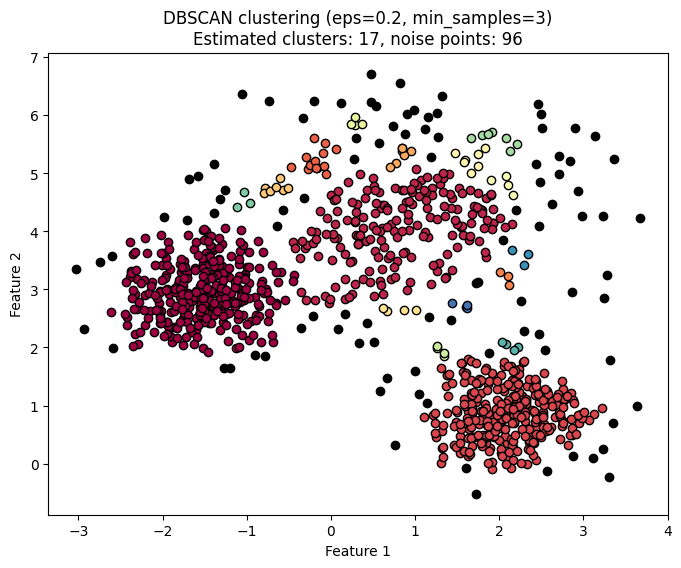

eps=0.2, min_samples=5
Estimated number of clusters: 10
Estimated number of noise points: 161


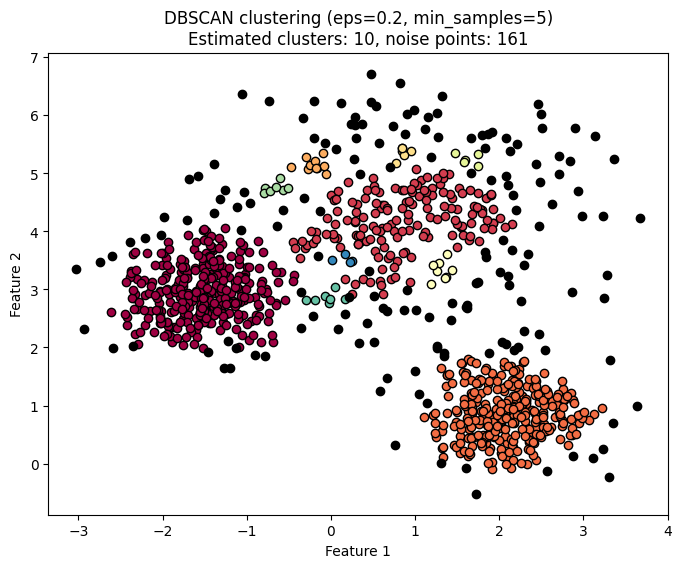

eps=0.2, min_samples=10
Estimated number of clusters: 5
Estimated number of noise points: 387


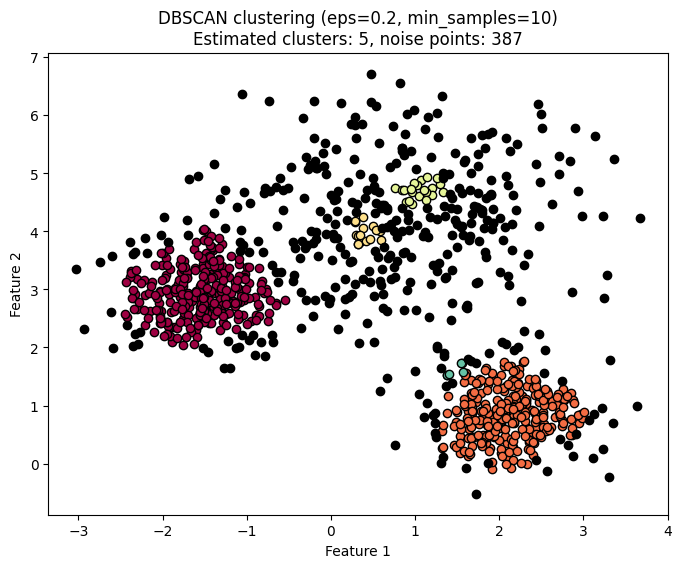

eps=0.3, min_samples=3
Estimated number of clusters: 5
Estimated number of noise points: 42


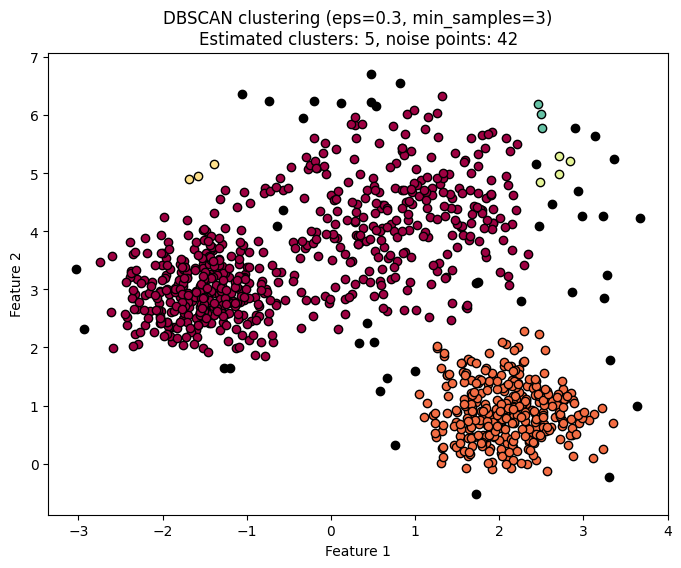

eps=0.3, min_samples=5
Estimated number of clusters: 5
Estimated number of noise points: 65


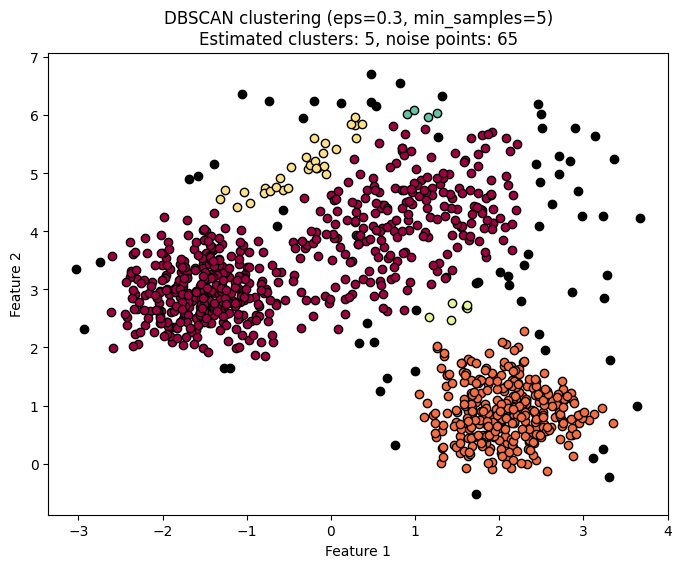

eps=0.3, min_samples=10
Estimated number of clusters: 4
Estimated number of noise points: 145


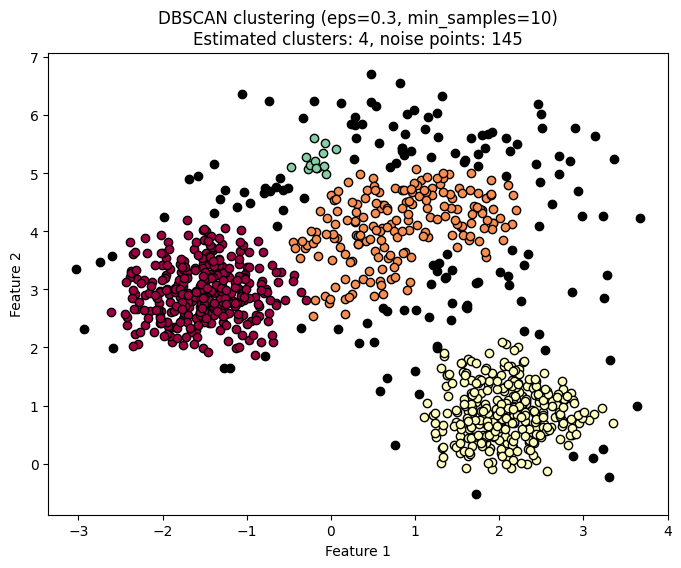

eps=0.4, min_samples=3
Estimated number of clusters: 4
Estimated number of noise points: 16


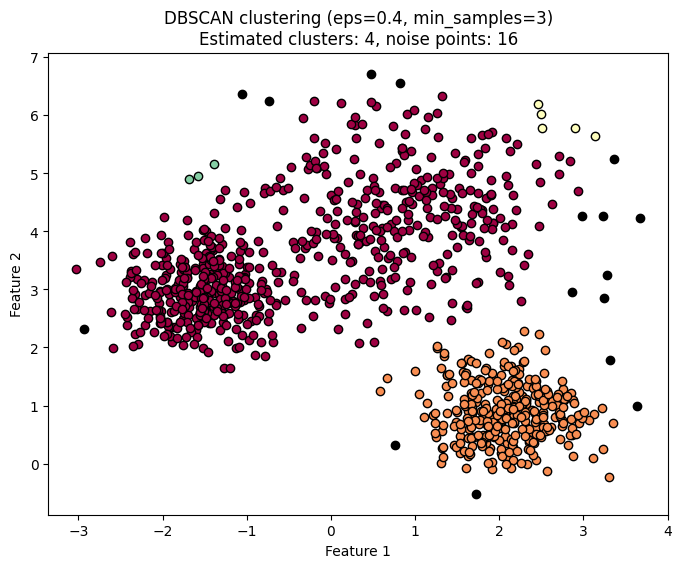

eps=0.4, min_samples=5
Estimated number of clusters: 2
Estimated number of noise points: 27


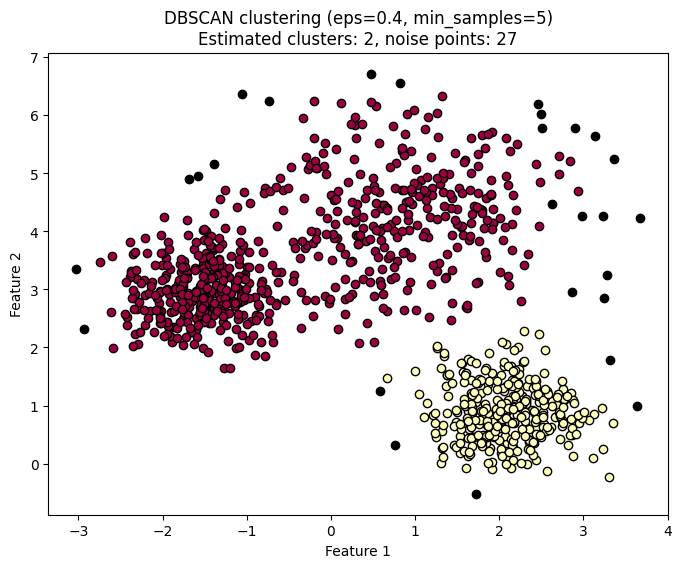

eps=0.4, min_samples=10
Estimated number of clusters: 2
Estimated number of noise points: 61


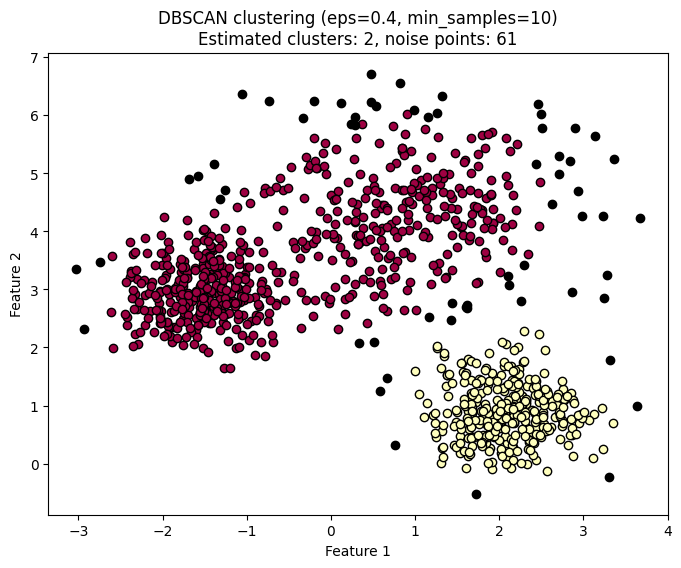

eps=0.5, min_samples=3
Estimated number of clusters: 2
Estimated number of noise points: 2


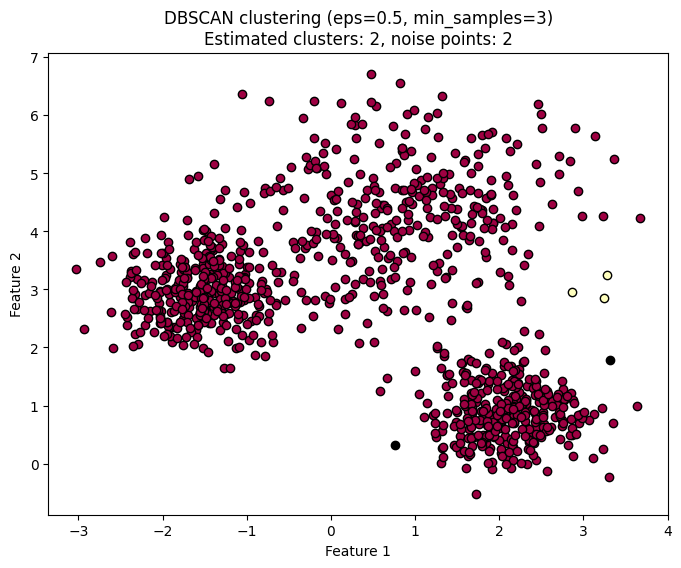

eps=0.5, min_samples=5
Estimated number of clusters: 1
Estimated number of noise points: 11


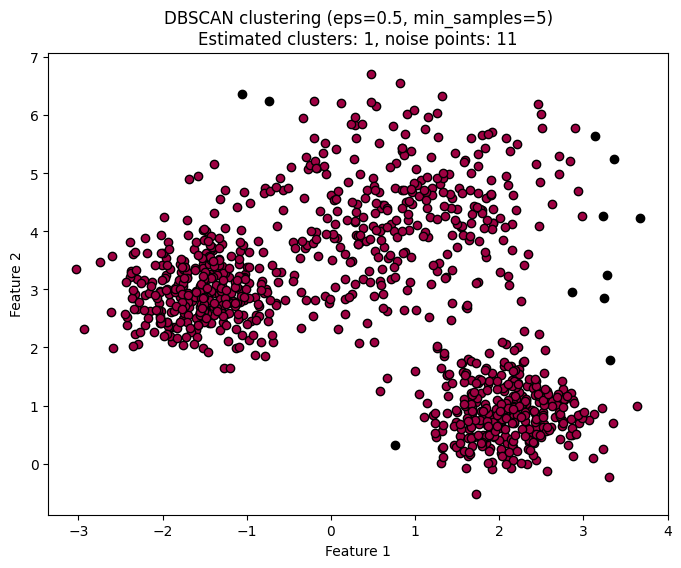

eps=0.5, min_samples=10
Estimated number of clusters: 2
Estimated number of noise points: 22


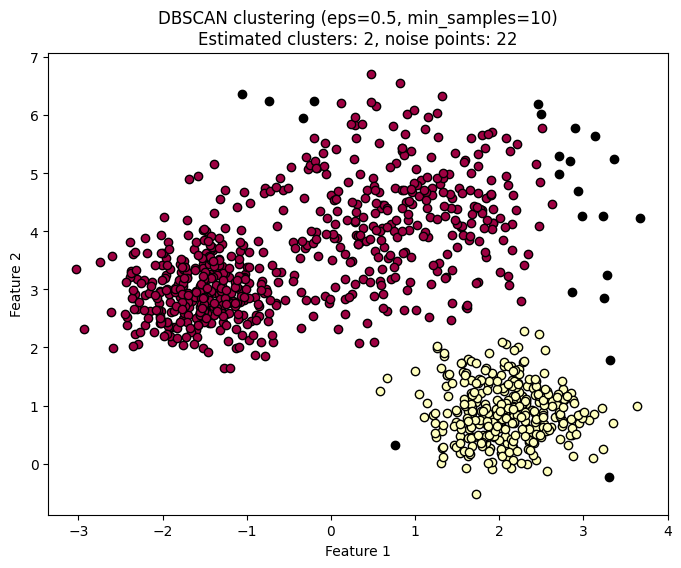

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Assuming X is already defined from previous tasks
# X is the dataset we are clustering

eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        labels = dbscan.labels_

        # Number of clusters in labels, ignoring noise if present
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        print(f"eps={eps}, min_samples={min_samples}")
        print(f"Estimated number of clusters: {n_clusters}")
        print(f"Estimated number of noise points: {n_noise}")

        # Plot result
        plt.figure(figsize=(8,6))
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]

        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)
            xy = X[class_member_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        plt.title(f'DBSCAN clustering (eps={eps}, min_samples={min_samples})\n'
                  f'Estimated clusters: {n_clusters}, noise points: {n_noise}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()


eps=0.3, min_samples=5
Estimated number of clusters: 5
Estimated number of noise points: 65


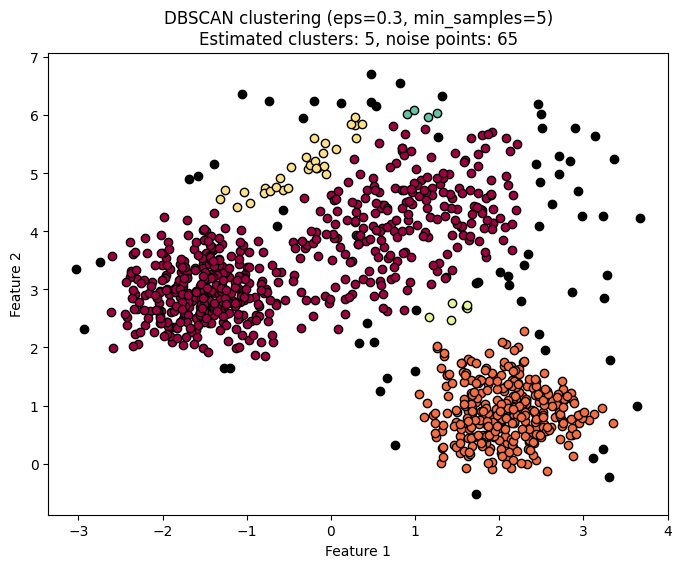

In [28]:
# Example with eps=0.3 and min_samples=5
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"eps=0.3, min_samples=5")
print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Plot the result
plt.figure(figsize=(8,6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN clustering (eps=0.3, min_samples=5)\n'
          f'Estimated clusters: {n_clusters}, noise points: {n_noise}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
